<p align="center">
  <img src="https://imsalione.ir/wp-content/uploads/2024/08/Cover-1920x2716.png" alt="imsalione"  width="700"/>
</p>

<section style="direction: rtl; text-align: justify; margin: 30px;">

## **بیان مسأله**

دیابت یکی از شایع‌ترین بیماری‌ها در دنیاست که هر ساله بر زندگی میلیون‌ها نفر تأثیر می‌گذارد و بار مالی قابل توجهی را بر اقتصاد کشورها به دنبال دارد. دیابت یک بیماری مزمن و پیش‌رونده است که در آن افراد قابلیت تنظیم سطح قند خون را به خوبی از دست می‌دهند. این وضعیت در نهایت منجر به کاهش کیفیت زندگی و کاهش امید به زندگی می‌شود. پس از تجزیه غذاهای مختلف به قندها در طول فرآیند هضم، قند وارد خون می‌شود. این عمل باعث می‌شود که غده پانکراس انسولین آزاد کند تا سلول‌ها بتوانند از قند موجود در خون برای تولید انرژی استفاده ‌کنند. دیابت به عدم تولید کافی انسولین یا ناتوانی بدن در استفاده از انسولین برای تبدیل قند خون به انرژی اتلاق می‌شود. عوارضی همچون بیماری‌های قلبی، از دست دادن دید، قطع اندام‌های پایین در نتیجه‌ی بریدگی، بیماری‌های کلیوی و موارد دیگر همگی ناشی از سطوح بالای قند خون در افراد دیابتی است. برای دیابت هیچ درمان مشخصی وجود ندارد. با این حال راهکارهایی مانند از دست‌دادن وزن، تغذیه سالم، فعالیت بدنی و دریافت درمان‌های پزشکی در کاهش آسیب‌های بیماری و کنترل آن نقش مهمی ایفا می‌کنند. تشخیص زودهنگام می‌تواند منجر به تغییرات سبک زندگی مبتلایان و درمان‌های موثر‌تر شود. بنابراین مدل‌های پیش‌بینی خطر دیابت، ابزارهای بسیار مهمی برای ارتقای آگاهی جامعه و مسئولان بهداشت و سلامت عمومی در کشورها است. بر اساس اعلام مرکز کنترل و پیشگیری بیماری‌های آمریکا (CDC) تا سال ۲۰۱۸، ۳۴/۲ میلیون آمریکایی دیابت دارند و 88 میلیون نفر نیز پیش‌دیابت دارند. علاوه بر این، CDC برآورد می‌کند که ۱ نفر از هر ۵ نفر دیابتی، و تقریبا ۸ نفر از هر ۱۰ نفر پیش‌دیابتی از وضعیت خود اطلاعی ندارند. در حالی که انواع مختلفی از دیابت وجود دارد، دیابت نوع دوم شایع‌ترین نوع آن است و شیوع آن بستگی به سن، تحصیلات، درآمد، محل زندگی، نژاد و سایر عوامل تعیین‌کننده‌ی اجتماعی سلامت دارد. بار بیماری بیشتر بر دوش افراد با وضعیت اقتصادی پایین است. دیابت همچنین بار سنگینی را بر اقتصاد به دنبال دارد. مجموع هزینه‌‌ی افراد تشخیص‌داده شده به دیابت تقریبا ۳۲۷ میلیارد دلار، و هزینه‌های کل به همراه افراد دیابتی تشخیص داده نشده و و افراد پیش‌دیابتی در حدود سالانه ۴۰۰ میلیارد دلار برآورد می‌شود. برای این منظور می‌خواهیم سامانه‌ای ایجاد کنیم که اطلاعاتی درباره وضعیت کاربر را از وی دریافت کند و خطر ابتلا به دیابت را به وی گزارش کند. این سامانه به یک مدل برای پیش‌بینی دیابت نیاز دارد. در این پروژه می‌خواهیم این مدل را با استفاده از داده‌هایی که در اختیار داریم ایجاد کنیم.

</section>

***
## **Step 1** 
### **Reading and Displaying CSV File Information**

In [3]:
import os
import pandas as pd

folder_name = "src"
file_name = "diabetes.csv"
absolute_path = os.path.join(folder_name, file_name)

# Reading the CSV file using the absolute path
with open(absolute_path, "r") as file:
    df = pd.read_csv(file)

# Printing the absolute file path
print(f"Absolute path: {absolute_path}")

# Printing the dimensions of the dataset
print("Dataset shape:", df.shape)

Absolute path: src/diabetes.csv
Dataset shape: (253680, 22)


***
## **Step 2** 
### **Calculating and Displaying Missing Data Summary**

In [4]:
import pandas as pd

# Calculating the number and percentage of missing data
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

# Creating a DataFrame for a more comprehensive view
missing_summary = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage': missing_percentage
})

# Filtering columns with missing data and sorting by percentage
missing_summary = missing_summary[missing_summary['Missing Values'] > 0]
missing_summary = missing_summary.sort_values(by='Percentage', ascending=False)

# Displaying the summary of missing data
print(missing_summary)
print("--------------------------")
print(missing_data)


Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []
--------------------------
Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


***
## **Step 3** 
### **Calculating and Displaying Frequency and Distribution of Target Variable**

In [3]:
# Defining variables for frequency and percentage distribution
frequency = df.Diabetes_012.value_counts()
distribution = df.Diabetes_012.value_counts(normalize=True)

# Printing the results
print("\nFrequency of each label value:\n", frequency)
print("\nDistribution of the target:\n", distribution)
print("\nFeatures:\n", df.columns)


Frequency of each label value:
 Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64

Distribution of the target:
 Diabetes_012
0.0    0.842412
2.0    0.139333
1.0    0.018255
Name: proportion, dtype: float64

Features:
 Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


***
## **Step 4** 
### **Replacing Values and Cleaning Column Names**

In [4]:
# Combine the 'Pre-diabetes' (1) and 'Diabetes' (2) classes into a single 'Diabetes' class
df['Diabetes_Binary'] = df['Diabetes_012'].replace({1.0: 1, 2.0: 1, 0.0: 0})

# Verify the new distribution of the target variable
diabetes_binary_distribution = df['Diabetes_Binary'].value_counts(normalize=True) * 100
print(diabetes_binary_distribution)

Diabetes_Binary
0.0    84.24117
1.0    15.75883
Name: proportion, dtype: float64


***
## **Step 5** 
### **Visualizing Correlation with Target Variable and Heatmap**

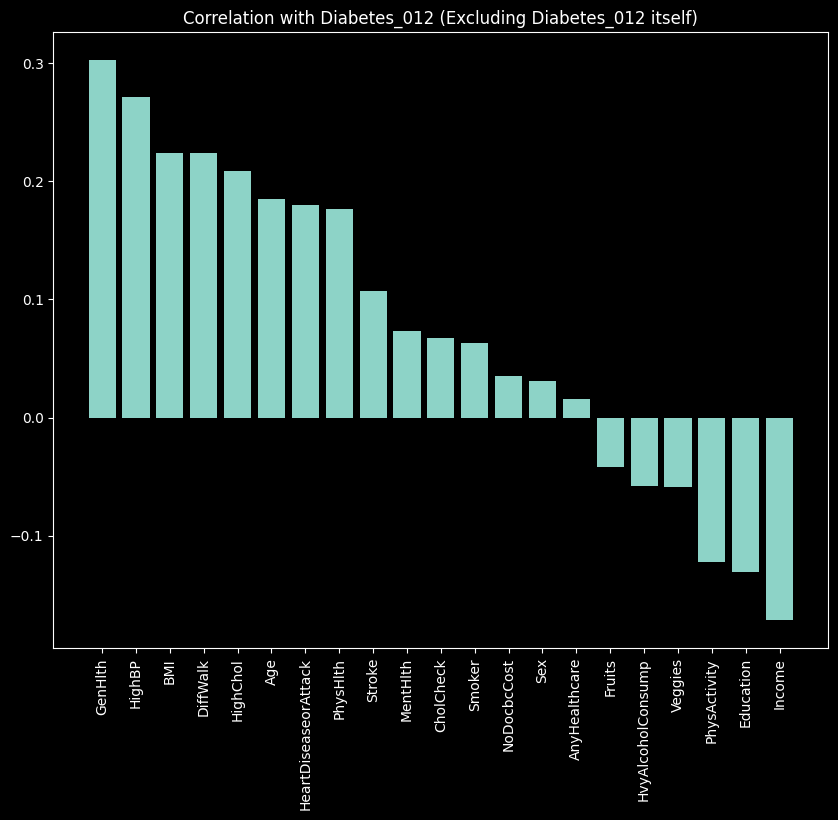

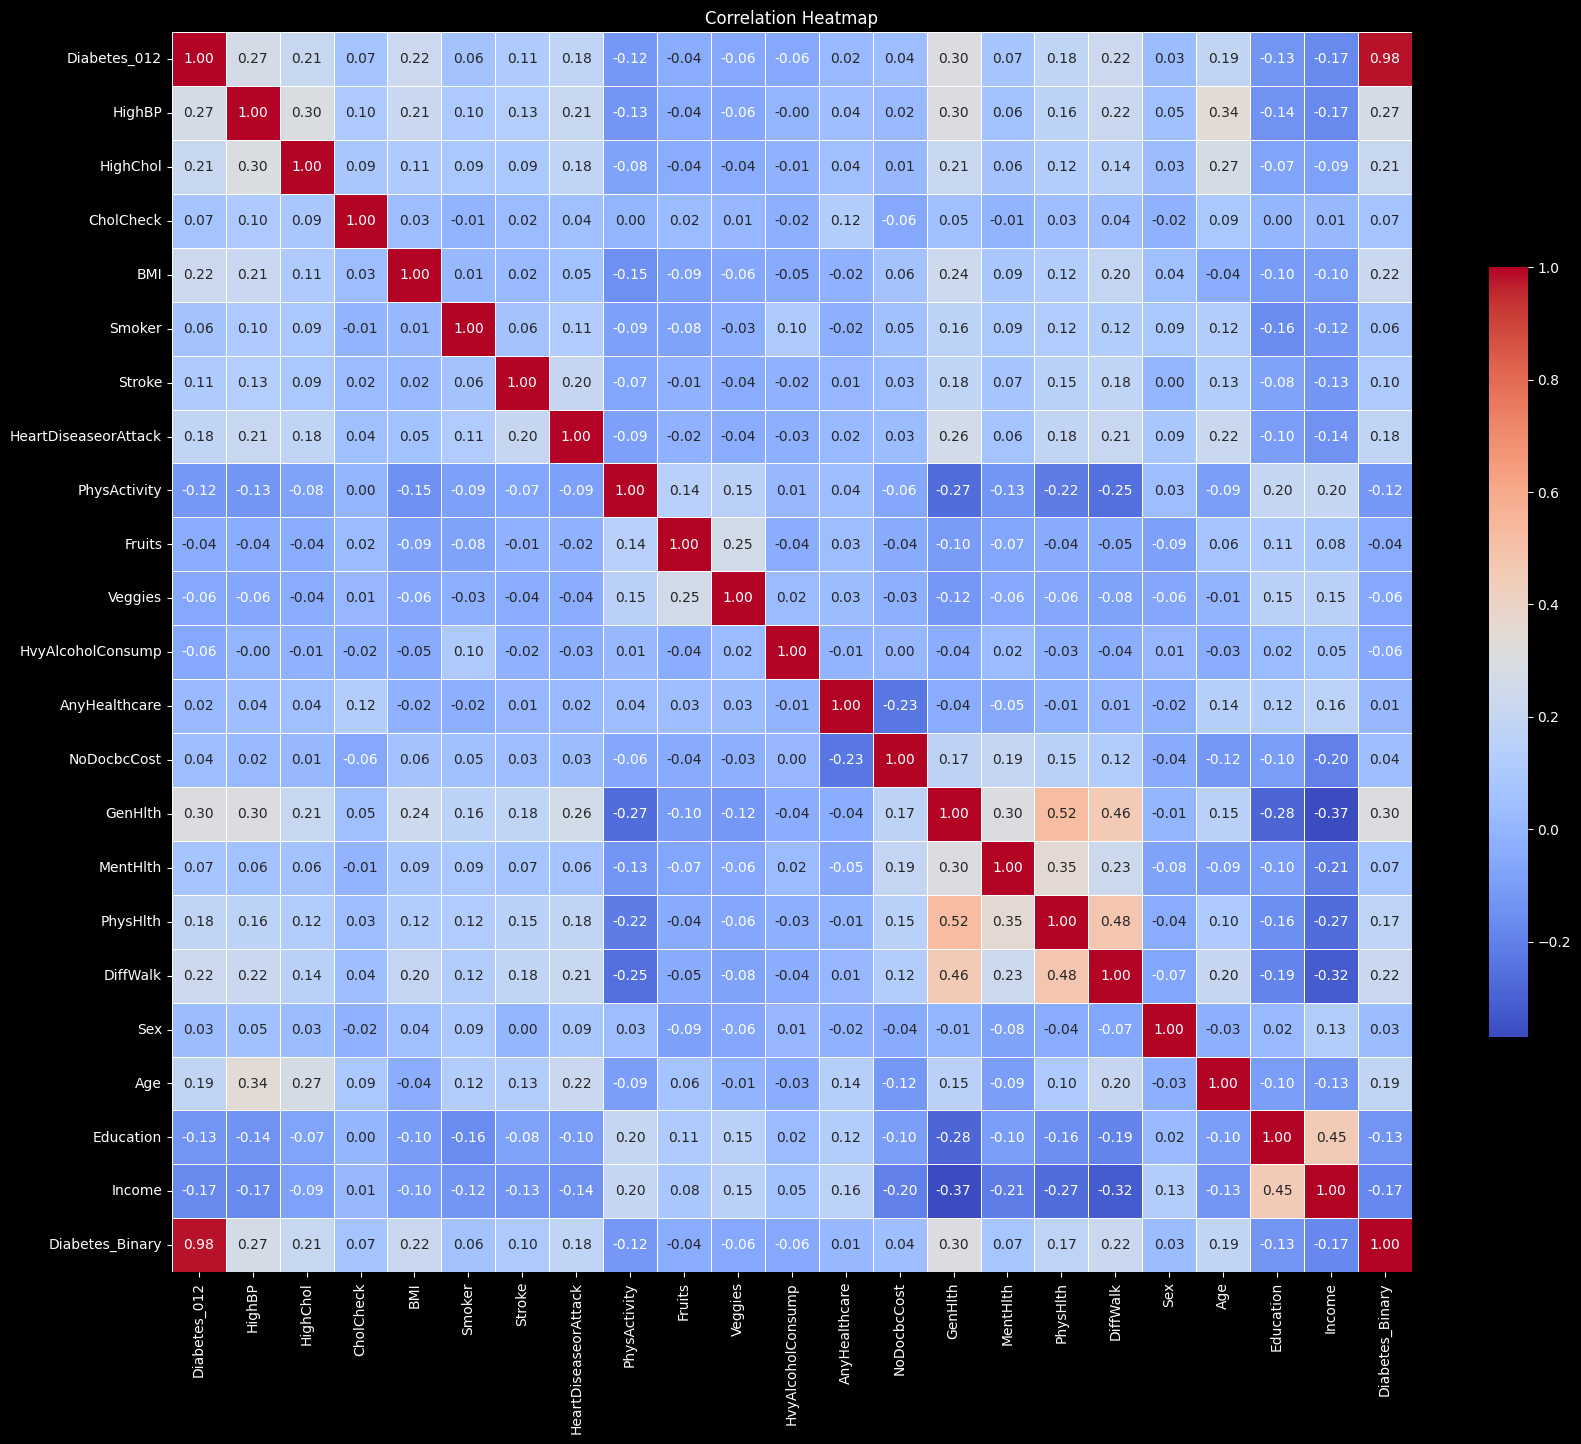

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the dimensions of the plot
plt.figure(figsize=(10, 8))

# Calculating the correlation using Pearson correlation coefficient
correlation_matrix = df.corr(method="pearson")
correlation_with_target = correlation_matrix["Diabetes_012"]

# Removing the 'Diabetes_012' column from the bar plot
correlation_with_target = correlation_with_target.drop(["Diabetes_012", "Diabetes_Binary"])

# Sorting the data for the bar plot
correlation_with_target = correlation_with_target.sort_values(ascending=False)

# Plotting the bar chart
fig2 = plt.bar(correlation_with_target.index, correlation_with_target)
plt.xticks(rotation=90)
plt.title("Correlation with Diabetes_012 (Excluding Diabetes_012 itself)")
plt.show()

# Displaying the heatmap of correlations between all features
plt.figure(figsize=(20, 20))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.5}
)
plt.title("Correlation Heatmap")
plt.show()


In [19]:
target_correlation = correlation_matrix['Diabetes_012'].sort_values(ascending=False)
target_correlation = target_correlation.drop(["Diabetes_012", "Diabetes_Binary"])
print(target_correlation)

GenHlth                 0.302587
HighBP                  0.271596
BMI                     0.224379
DiffWalk                0.224239
HighChol                0.209085
Age                     0.185026
HeartDiseaseorAttack    0.180272
PhysHlth                0.176287
Stroke                  0.107179
MentHlth                0.073507
CholCheck               0.067546
Smoker                  0.062914
NoDocbcCost             0.035436
Sex                     0.031040
AnyHealthcare           0.015410
Fruits                 -0.042192
HvyAlcoholConsump      -0.057882
Veggies                -0.058972
PhysActivity           -0.121947
Education              -0.130517
Income                 -0.171483
Name: Diabetes_012, dtype: float64


***
## **Step 7** 
### **Filtering Features Based on Low Correlation with Target Variable**

In [20]:
# Calculating the correlation with the target using Pearson correlation coefficient
correlation_with_target = df.corr(method="pearson")["Diabetes_012"]

# Setting a threshold for correlation
threshold = 0.05

# Selecting features with correlation less than the threshold
low_correlation_features = correlation_with_target[abs(correlation_with_target) < threshold].index

# Dropping these low-correlation features from the DataFrame
df_filtered = df.drop(columns=low_correlation_features)

# Displaying the names of removed features and the columns of the filtered DataFrame
print("Features with low correlation (removed):", low_correlation_features.tolist())
print("\nFiltered DataFrame columns:", df_filtered.columns.tolist())


Features with low correlation (removed): ['Fruits', 'AnyHealthcare', 'NoDocbcCost', 'Sex']

Filtered DataFrame columns: ['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Education', 'Income', 'Diabetes_Binary']


***
## **Step 6** 
### **Visualizing the Distribution of Health Features by Diabetes Status**

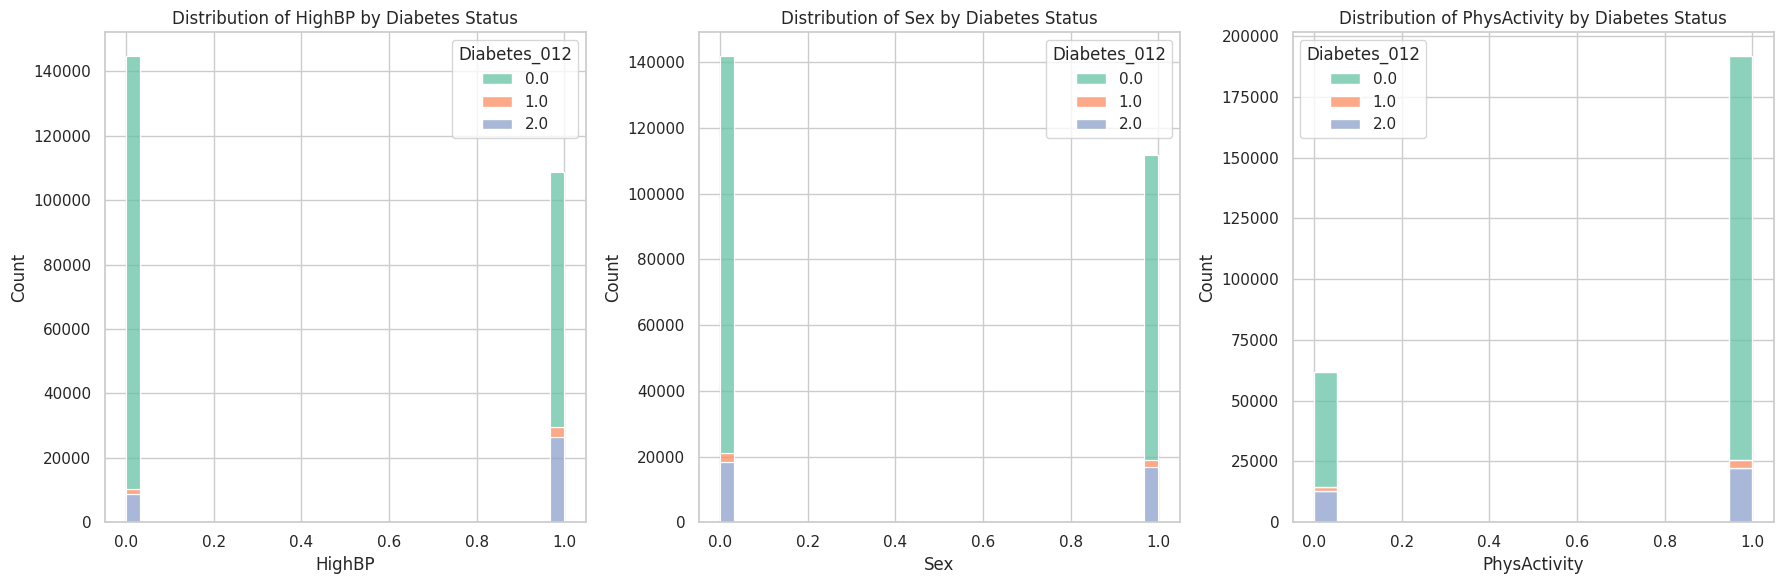

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting environment
sns.set(style="whitegrid")

# Define the features to be analyzed
features = ['HighBP', 'Sex', 'PhysActivity']

# Create a plot for each feature
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

for i, feature in enumerate(features):
    sns.histplot(data=df, x=feature, hue='Diabetes_012', multiple='stack', kde=False, palette="Set2", ax=axes[i])
    axes[i].set_title(f"Distribution of {feature} by Diabetes Status")
    axes[i].set_xlabel(f"{feature}")
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()

***
## **Step 7** 
### **Standardizing a Column and Visualizing Histogram Before and After Scaling**

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

def plot_and_standardize_column(df, column_name):
    """
    This function displays the histogram of a column before and after standardization
    and standardizes the column.

    :param df: DataFrame
    :param column_name: The name of the column to be standardized (string)
    :return: DataFrame with the standardized column
    """
    
    # Create a figure with two subplots side by side
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
    
    # Display histogram before standardization
    df.hist(column=column_name, ax=axes[0])
    axes[0].set_title(f'Histogram of {column_name} before Standardization')
    
    # Standardize the column
    scaler = StandardScaler()
    df[column_name] = scaler.fit_transform(df[[column_name]])
    
    # Display histogram after standardization
    df.hist(column=column_name, ax=axes[1])
    axes[1].set_title(f'Histogram of {column_name} after Standardization')
    
    # Adjust layout to make sure everything fits
    plt.tight_layout()
    plt.show()
    
    return df

*** 

<h2 style="align: center; text-align: center;"> BMI Standardizing </h2>

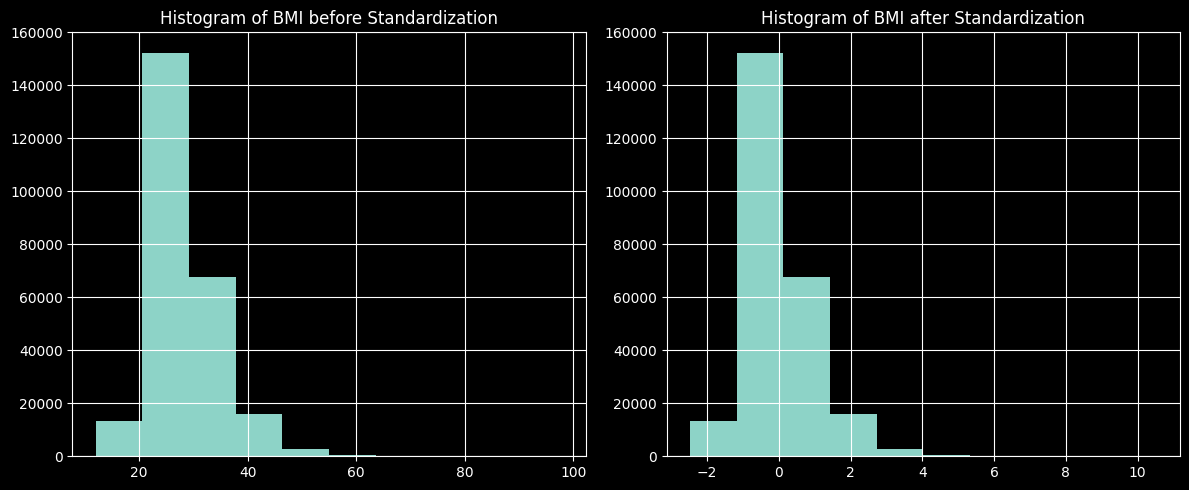

In [8]:
df = plot_and_standardize_column(df, "BMI")

*** 

<h2 style="align: center; text-align: center"> GenHlth Standardizing </h2>

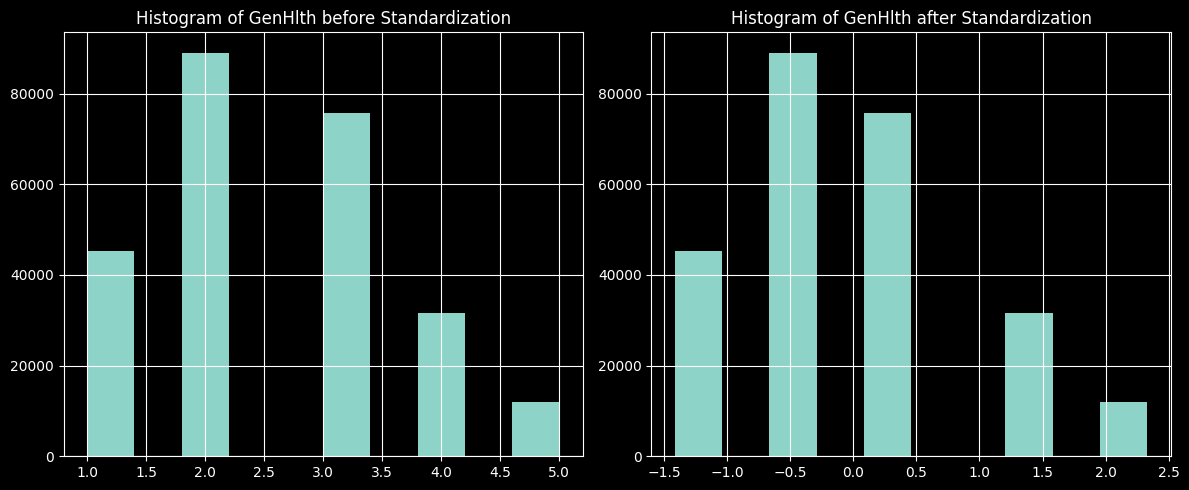

In [9]:
df = plot_and_standardize_column(df, "GenHlth")

*** 

<h2 style="align: center; text-align: center"> MentHlth Standardizing </h2>

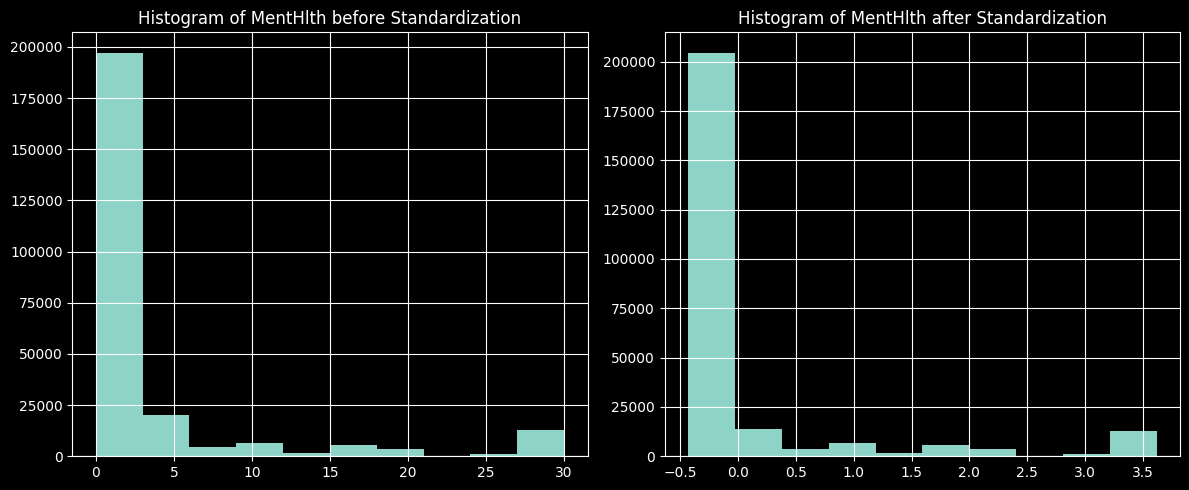

In [10]:
df = plot_and_standardize_column(df, "MentHlth")

*** 

<h2 style="align: center; text-align: center"> PhysHlth Standardizing </h2>

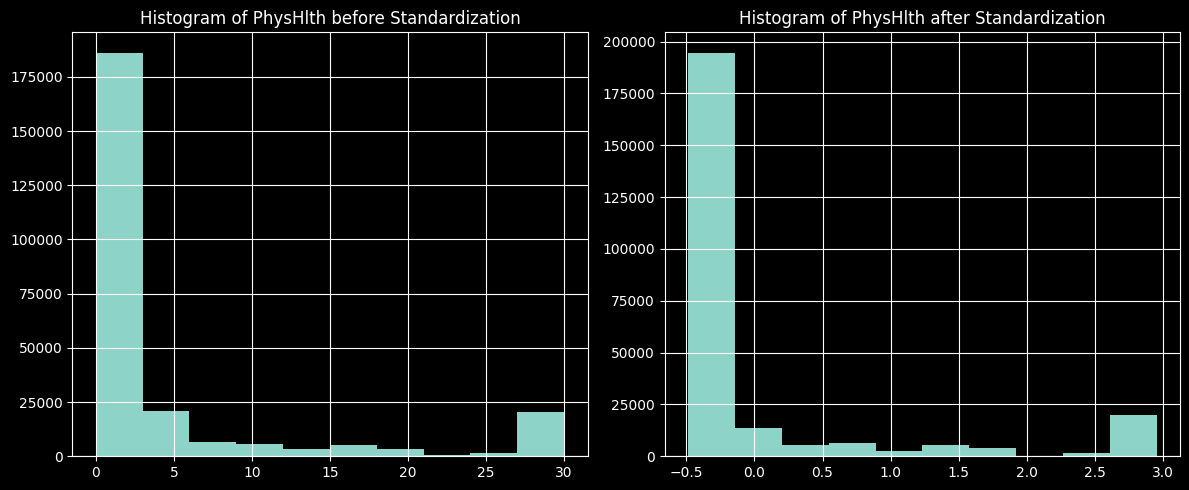

In [11]:
df = plot_and_standardize_column(df, "PhysHlth")

*** 

<h2 style="align: center; text-align: center"> Age Standardizing </h2>

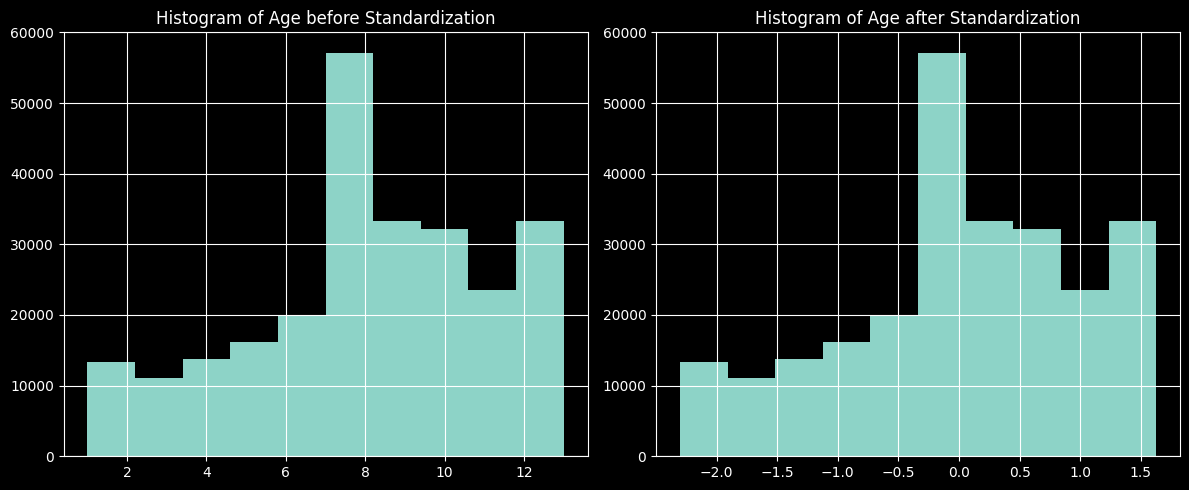

In [12]:
df = plot_and_standardize_column(df, "Age")

***
## **Step 8** 
### **One-Hot Encoding and Integrating (Encoding Gender for Analysis of Its Impact on the Dataset)**

### Description:
This code focuses on processing the `Sex` column to evaluate its impact on the dataset. It performs the following steps:
1. **Distribution Analysis**: Displays the distribution of gender values in the dataset to understand the gender distribution.
2. **One-Hot Encoding**: Converts the `Sex` column into a binary format using one-hot encoding. This is done to transform categorical gender data into numerical form suitable for machine learning models.
3. **Integration**: Merges the one-hot encoded gender data back into the original dataset, while removing the original `Sex` column to avoid redundancy.

This preprocessing helps in analyzing how gender affects other features or the target variable in the dataset by transforming it into a format that can be effectively used in statistical analysis or machine learning models.

In [23]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Displaying the distribution of genders
print(df["Sex"].value_counts(normalize=True))

# Applying One-Hot Encoding to the 'Sex' column
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Dropping the first category to avoid multicollinearity
gender_encoded = encoder.fit_transform(df[["Sex"]])

# Converting the encoded result to a DataFrame and combining it with the original df
gender_encoded_df = pd.DataFrame(gender_encoded, columns=encoder.get_feature_names_out(["Sex"]))
df_encoded = pd.concat([df.drop("Sex", axis=1).reset_index(drop=True), gender_encoded_df.reset_index(drop=True)], axis=1)

Sex
0.0    0.559658
1.0    0.440342
Name: proportion, dtype: float64


***
## **Step 9** 
### **Splitting Data, Applying SMOTE for Class Balancing, and Optional Validation Split**


### Explanation
This code snippet demonstrates how to balance an imbalanced dataset using Synthetic Minority Over-sampling Technique (SMOTE). 

1. **Data Separation**: It separates the features (`X`) from the target variable (`y`), where `y` is the binary classification target (`Diabetes_Binary`).
   
2. **Train-Test Split**: The dataset is divided into training and testing sets, with 80% of the data allocated for training and 20% for testing. The `stratify=y` parameter ensures that the class distribution in the training and testing sets is proportional to the original dataset.

3. **Applying SMOTE**: SMOTE is applied to the training set to create synthetic samples of the minority class, thus balancing the class distribution in the training data.

4. **Distribution Check**: The distribution of the target variable in the resampled training set is printed to verify the balancing effect.

In [22]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df.drop(columns=['Diabetes_012', 'Diabetes_Binary'])
y = df['Diabetes_Binary']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the distribution of the resampled target variable
resampled_distribution = y_train_resampled.value_counts(normalize=True) * 100
print(resampled_distribution)

Diabetes_Binary
1.0    50.0
0.0    50.0
Name: proportion, dtype: float64


***
## **Step 10** 
### **Enhanced Logistic Regression with Extended Iterations and F1-Score Evaluation**

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

# Increasing the number of iterations for better convergence
param_grid = {
    "penalty": ["l1", "l2"],
    "C": [0.01, 0.1, 1.0, 10.0, 100.0],
    "solver": ["saga"],
    "max_iter": [500, 1000, 1500],  
    "fit_intercept": [True, False],
}

grid_search = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=param_grid,
    scoring="f1_weighted",
    cv=5,
    refit=True,
    n_jobs=-1,
    verbose=1,
)

# Training the model
grid_search.fit(X_train, y_train)

# Displaying the best parameters found by grid search
print("Best parameters: ", grid_search.best_params_)

# Using the best model to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculating F1-score for the test data
f1 = f1_score(y_test, y_pred, average="weighted")
print(f"F1-score on test set: {f1:.2f}")

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters:  {'C': 10.0, 'fit_intercept': True, 'max_iter': 500, 'penalty': 'l1', 'solver': 'saga'}
F1-score on test set: 0.82


***
## **Step 11** 
### **Impact Analysis of Features on Diabetes Prediction: Key Factors and Their Influences**

In [28]:
import pandas as pd

# Extracting coefficients and feature names
coefficients = best_model.coef_[0]
feature_names = X.columns

# Combining feature names and coefficients into a DataFrame
feature_coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sorting by the absolute value of coefficients in descending order
feature_coefficients_df['Absolute Coefficient'] = feature_coefficients_df['Coefficient'].abs()
feature_coefficients_df = feature_coefficients_df.sort_values(by='Absolute Coefficient', ascending=False)

# Displaying the results without the index
print(feature_coefficients_df[['Feature', 'Coefficient']].to_string(index=False))

             Feature  Coefficient
           CholCheck     1.193983
              HighBP     0.707211
   HvyAlcoholConsump    -0.658556
            HighChol     0.593565
             GenHlth     0.517925
                 Sex     0.241299
HeartDiseaseorAttack     0.197638
                 Age     0.128159
            DiffWalk     0.099017
              Stroke     0.073376
         NoDocbcCost     0.066712
                 BMI     0.062266
       AnyHealthcare     0.057886
              Income    -0.055995
        PhysActivity    -0.050521
              Fruits    -0.047290
           Education    -0.035284
             Veggies    -0.025400
              Smoker    -0.016993
            PhysHlth    -0.006777
            MentHlth    -0.001581


***
## **Step 12** 
### **Impact Analysis of Features on Diabetes Prediction: Key Factors and Their Influences**

In [8]:
from sklearn.model_selection import train_test_split

# Assuming 'Diabetes' is the target variable and the rest are features
# Replace 'Diabetes' with the actual column name for the target variable in your dataset
X = df.drop(columns=['Diabetes_012'])  # Features
y = df['Diabetes_012']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define the hyperparameters and their values for the grid search
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],  # L1 for Lasso, L2 for Ridge
    'solver': ['liblinear']  # Solver for small datasets and for L1 penalty
}

# Initialize the logistic regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Set up the grid search
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score}")

# Train the final model with the best parameters
best_model = grid_search.best_estimator_

# Evaluate the final model on the test set
y_pred_best = best_model.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred_best)
final_class_report = classification_report(y_test, y_pred_best)

print(f"Final Test Accuracy: {final_accuracy}")
print("Final Classification Report:\n", final_class_report)

Best Parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.7347890256002749
Final Test Accuracy: 0.9351742352570167
Final Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     42741
         1.0       0.16      0.58      0.25       926
         2.0       0.92      0.59      0.72      7069

    accuracy                           0.94     50736
   macro avg       0.69      0.72      0.65     50736
weighted avg       0.97      0.94      0.95     50736



In [17]:
# Select features with a correlation higher than a threshold value (e.g., 0.1)
important_features = target_correlation[target_correlation > 0.1].index.tolist()

# Create a new DataFrame with the important features
df_important = df[important_features]

print("Selected Important Features:\n", important_features)

Selected Important Features:
 ['Diabetes_012', 'GenHlth', 'HighBP', 'BMI', 'DiffWalk', 'HighChol', 'Age', 'HeartDiseaseorAttack', 'PhysHlth', 'Stroke']


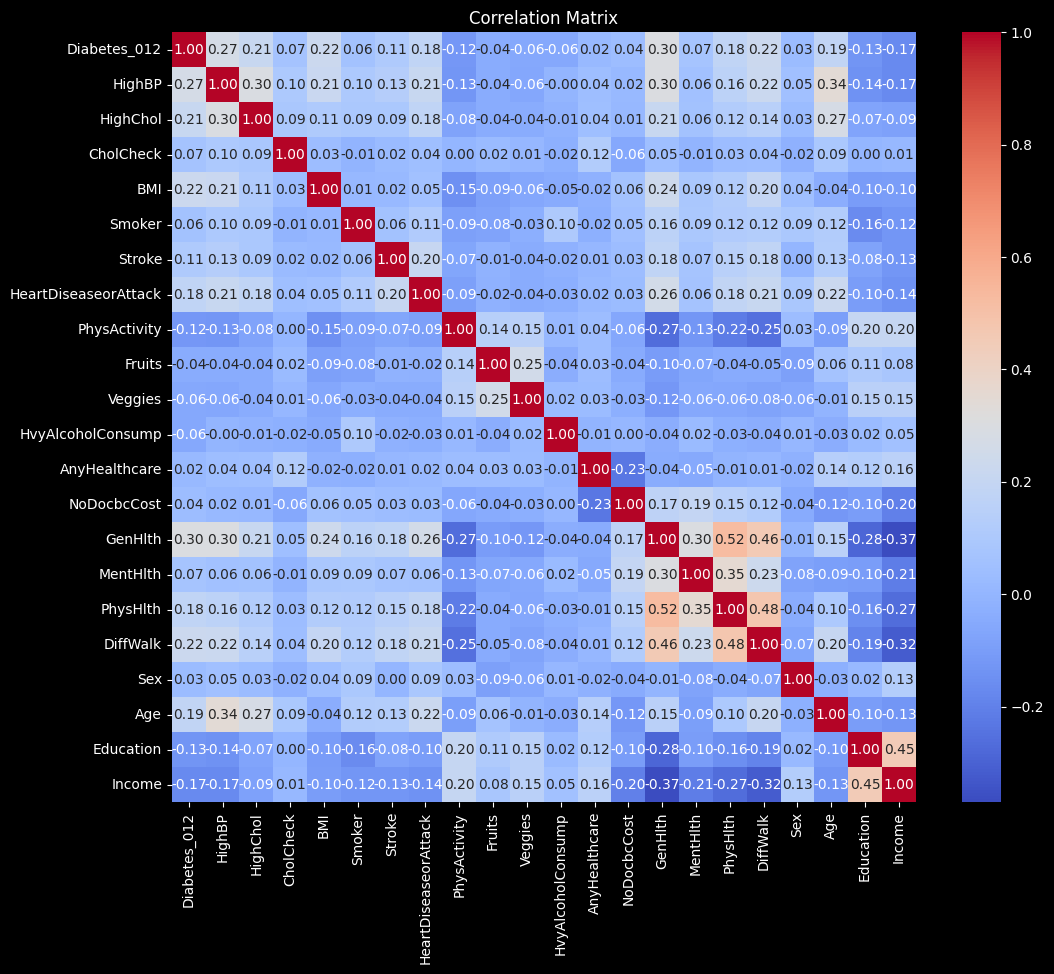

Diabetes_012            1.000000
GenHlth                 0.302587
HighBP                  0.271596
BMI                     0.224379
DiffWalk                0.224239
HighChol                0.209085
Age                     0.185026
HeartDiseaseorAttack    0.180272
PhysHlth                0.176287
Stroke                  0.107179
MentHlth                0.073507
CholCheck               0.067546
Smoker                  0.062914
NoDocbcCost             0.035436
Sex                     0.031040
AnyHealthcare           0.015410
Fruits                 -0.042192
HvyAlcoholConsump      -0.057882
Veggies                -0.058972
PhysActivity           -0.121947
Education              -0.130517
Income                 -0.171483
Name: Diabetes_012, dtype: float64

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot a heatmap to show the correlation between features
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Display the correlation of features with the target variable
target_correlation = correlation_matrix['Diabetes_012'].sort_values(ascending=False)
target_correlation

In [23]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Split the data into training and testing sets
X = df_important.drop('Diabetes_012', axis=1)
y = df_important['Diabetes_012']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Use SMOTE to address the class imbalance issue
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Create models using OneVsRestClassifier for logistic regression
models = {
    "Logistic Regression": OneVsRestClassifier(LogisticRegression(max_iter=1000, solver='liblinear')),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Train and evaluate the models
for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)
    
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

Model: Logistic Regression
              precision    recall  f1-score   support

         0.0       0.95      0.69      0.79     64180
         1.0       0.03      0.23      0.06      1425
         2.0       0.34      0.62      0.44     10499

    accuracy                           0.67     76104
   macro avg       0.44      0.51      0.43     76104
weighted avg       0.85      0.67      0.73     76104

--------------------------------------------------
Model: Decision Tree
              precision    recall  f1-score   support

         0.0       0.88      0.85      0.87     64180
         1.0       0.02      0.03      0.03      1425
         2.0       0.31      0.36      0.33     10499

    accuracy                           0.77     76104
   macro avg       0.41      0.42      0.41     76104
weighted avg       0.79      0.77      0.78     76104

--------------------------------------------------
Model: Random Forest
              precision    recall  f1-score   support

         0.0

Top 10 Important Features:
                Feature  Importance
2                   BMI    0.248483
5                   Age    0.196084
0               GenHlth    0.153802
1                HighBP    0.109524
7              PhysHlth    0.106379
4              HighChol    0.081541
3              DiffWalk    0.045787
6  HeartDiseaseorAttack    0.036060
8                Stroke    0.022341


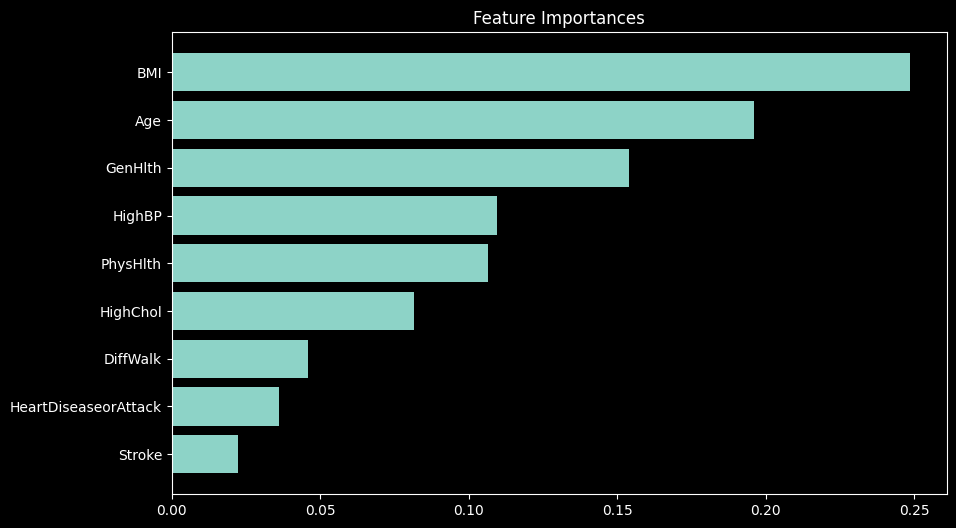

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Retrain the RandomForest model with all training data
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_smote, y_train_smote)

# Extract feature importances
importances = rf.feature_importances_
feature_names = X.columns

# Create a DataFrame from feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 important features
print("Top 10 Important Features:")
print(feature_importance_df.head(10))

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.gca().invert_yaxis()
plt.show()

Restarted Python 3.11.3

<style>
    .markdown-title {
        font-family: B Yekan+;
        color: #BA4A00;
        font-weight: 1500;
        font-size: 220%;
        text-align: center;
        padding: 40px 0px 0px 5px      
    }
    .markdown-container {
        font-family: B Yekan+;
        color: #27AE60;
        font-weight: 1500;
        direction: rtl;
        text-align: justify;
        margin: 0px 50px 0px 50px;
        line-height: 180%;
    }
    .table {
        align: center;
        border: 0px;
        width: 100%;
        text-align: center;
    }
    .specialP {
        font-family: B Yekan+;
        color: #F1C40F;
        font-weight: 1500;
        direction: rtl;
        text-align: justify;
        margin: 0px 50px 0px 50px;
        line-height: 180%;
    }
</style>

<hr><hr><hr>
<table>
    <tr>
        <th class="table">            
            <p class = "markdown-title"> مرحله 19 - تجزیه و تحلیل ویژگی‌های مهم  </p>            
        </th>
    </tr>
    <tr>
        <th class="table">            
            <p class = "markdown-container">
             در اجرای مدل زیر با ورود پارامترهای مناسب‌تر به نتایج متفاوتی دست پیدا می‌کنیم. در اینجا f1-score معادل با 76٪ شده است. در این آمار سن، چکاپ کلسترول، مصرف الکل، فشار خون بالا، ارزیابی سطح سلامت، شاخص توده بدنی و بالا بودن کلسترول بیشترین تاثیرگذاری را نمایش می‌دهند. به لحاظ تفسیری، یکی از نکات حائز اهمیت این است که مردها با مرتبه‌ی بالاتر، بیشتر از زن‌ها در معرض خطر ابتلا به دیابت هستند.
            </p>
            <p class="specialP"> با این حال در نهایت می‌توان گفت اگر عواملی که در اختیار فرد نیستند مانند سن و سطح سلامت عمومی نادیده 
            گرفته شود، عواملی مانند مصرف الکل زیاد، فشار خون بالا، کلسترول بالا و BMI بالا منجر به دیابت و پیشا دیابت می‌شوند. </p>
            <p class="markdown-container">مدل رگرسیون لجستیک با استفاده از جستجوی شبکه‌ای هایپرپارامترها اصلاح می کند. بهترین عملکرد مدل را در مجموعه تست ارزیابی می کند و بهترین هایپرپارامترها و f1-score را چاپ می کند. علاوه بر این، مهم ترین ویژگی ها را بر اساس ضرایب آنها شناسایی و چاپ می کند. این به درک اینکه کدام ویژگی بیشترین تأثیر را بر پیش‌بینی‌های مدل دارد کمک می‌کند.
             </p>            
        </th>
    </tr>
</table>

</br>
<span dir="rtl" align="center" style="color: #2E86C1">
<p><b> 👇 در قطعه کد زیر آن را مشاهده می‌کنید 👇 </b></p>

In [33]:
logistic_reg = LogisticRegression(random_state=0)
param_grid = {
    "penalty": ["l1", "l2"],
    "C": [ 0.1, 1.0, 3.0, 5.0, 10.0],
    "solver": ["saga"],
    "max_iter": [100, 200, 300],
    "fit_intercept": [True, False],
}

grid_search = GridSearchCV(
    estimator=logistic_reg,
    param_grid=param_grid,
    scoring="f1_weighted",  # Use F1-score as the scoring metric
    cv=5,
    refit=True,
)

grid_search.fit(X_train, y_train)
print("Best parameters: ", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
f1 = f1_score(y_test, y_pred, average="weighted")
print("F1-score on test set: ", f1)
# The most significant features

coefficients = best_model.coef_[0]
feature_names = list(X.columns)
feature_coefficients = list(zip(feature_names, coefficients))
sorted_feature_coefficients = sorted(
    feature_coefficients, key=lambda x: abs(x[1]), reverse=True
)

for feature, coefficient in sorted_feature_coefficients:
    print(f"Feature: {feature}, Coefficient: {coefficient}")

Best parameters:  {'C': 1.0, 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
F1-score on test set:  0.8155960192176428
Feature: CholCheck, Coefficient: 1.197042421772272
Feature: HighBP, Coefficient: 0.7070331746272587
Feature: HvyAlcoholConsump, Coefficient: -0.6576630492910259
Feature: HighChol, Coefficient: 0.593521549150314
Feature: GenHlth, Coefficient: 0.5536223941341736
Feature: BMI, Coefficient: 0.4117459891011672
Feature: Age, Coefficient: 0.39174457984760397
Feature: Sex, Coefficient: 0.241338066119528
Feature: HeartDiseaseorAttack, Coefficient: 0.19752573594272757
Feature: DiffWalk, Coefficient: 0.09889177864109071
Feature: Stroke, Coefficient: 0.07336169142959043
Feature: NoDocbcCost, Coefficient: 0.06715023222051736
Feature: PhysHlth, Coefficient: -0.05915035721508688
Feature: AnyHealthcare, Coefficient: 0.059061682408413564
Feature: Income, Coefficient: -0.05597295994427935
Feature: PhysActivity, Coefficient: -0.05034898126211563
Feature: Fruits

<style>
    .markdown-title {
        font-family: B Yekan+;
        color: #BA4A00;
        font-weight: 1500;
        font-size: 220%;
        text-align: center;
        padding: 40px 0px 0px 5px      
    }
    .markdown-container {
        font-family: B Yekan+;
        color: #27AE60;
        font-weight: 1500;
        direction: rtl;
        text-align: justify;
        margin: 0px 50px 0px 50px;
        line-height: 180%;
    }
    .table {
        align: center;
        border: 0px;
        width: 100%;
        text-align: center;
    }
    .specialP {
        font-family: B Yekan+;
        color: #F1C40F;
        font-weight: 1500;
        direction: rtl;
        text-align: justify;
        margin: 0px 50px 0px 50px;
        line-height: 180%;
    }
</style>

<hr><hr><hr>
<table>
    <tr>
        <th class="table">            
            <p class = "markdown-title"> مرحله 20 - ماتریس سردرگمی </p>            
        </th>
    </tr>
    <tr>
        <th class="table">            
            <p class = "markdown-container">
             در تصویر حرارتی زیر بلوک‌هایی که به رنگ روشن هستند، مقادیری را نشان می‌دهند که ما به درستی بدست آورده‌ایم و در مقابل بلوک‌هایی که به رنگ تیره هستند محاسبات اشتباه ما (خطای نوع اول) هستند.
            در ردیف ۰ نشان می‌دهد افراد سالم به میزان 73٪ درست تشخیص داده شده و در ردیف ۱ افراد پیش دیابتی و مبتلا به دیابت به میزان 24٪ محاسبات اشتباه و 76٪ درصد محاسبات درستی داشته‌ایم.
            بنابراین افرادی که واقعا سالم هستند و ما نیز همین پیش‌بینی را داشته‌ایم 73٪، افرادی که سالم نبوده‌اند و ما به اشتباه پیش بینی سالم بودن از آن‌ها داشته‌ایم 27٪، افرادی که مبتلا به دیابت هستند اما تشخیص عدم دیابت داده‌ایم 24٪ درصد و فردی که طبق پیش بینی ما دیابت داشته و در واقعیت نیز مبتلا به دیابت بوده 76٪ میزان درستی تشخیص ما بوده است.
            <p class="specialP">از این نمودار می‌توان نتیجه گرفت (با توجه به overfit بودن آن) تشخیص ما در پیدا کردن افراد مبتلا به دیابت با آمار بالای 70٪، قابل قبول و خوب می‌باشد. </p>
             </p>            
        </th>
    </tr>
</table>

</br>
<span dir="rtl" align="center" style="color: #2E86C1">
<p><b> 👇 در قطعه کد زیر آن را مشاهده می‌کنید 👇 </b></p>

              precision    recall  f1-score   support

         0.0       0.94      0.73      0.82     42754
         1.0       0.34      0.76      0.47      7982

    accuracy                           0.73     50736
   macro avg       0.64      0.74      0.65     50736
weighted avg       0.85      0.73      0.76     50736


The confusion matrix:

[[0.72533564 0.27466436]
 [0.23841143 0.76158857]]


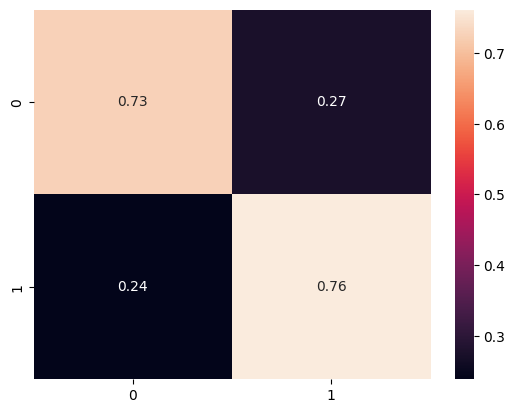

In [ ]:
print(classification_report(y_test, y_pred))
print('\nThe confusion matrix:\n')
conf_mat = confusion_matrix(y_test, y_pred, normalize='true')
print(conf_mat)
ax=sns.heatmap(conf_mat, annot=True)

<style>
    .markdown-title {
        font-family: B Yekan+;
        color: #BA4A00;
        font-weight: 1500;
        font-size: 220%;
        text-align: center;
        padding: 40px 0px 0px 5px      
    }
    .markdown-container {
        font-family: B Yekan+;
        color: #27AE60;
        font-weight: 1500;
        direction: rtl;
        text-align: justify;
        margin: 0px 50px 0px 50px;
        line-height: 180%;
    }
    .table {
        align: center;
        border: 0px;
        width: 100%;
        text-align: center;
    }
    .specialP {
        font-family: B Yekan+;
        color: #F1C40F;
        font-weight: 1500;
        direction: rtl;
        text-align: justify;
        margin: 0px 50px 0px 50px;
        line-height: 180%;
    }
</style>

<hr><hr><hr>
<table>
    <tr>
        <th class="table">            
            <p class = "markdown-title"> مرحله 21 - اجرای مدل بر روی کل داده‌ها </p>            
        </th>
    </tr>
    <tr>
        <th class="table">            
            <p class = "markdown-container">
             در این قسمت مشابه کد بالا اما بدون در نظر گرفتن train-test-split و اعمال کل داده، محاسبات را مجددا انجام داده‌ایم. نتیجه‌ای که به دست می‌آید نشان از سازگاری آن دارد و مشابه نتیجه قبلی که به دست آوردیم می‌باشد.
            <p class="specialP">
            نکته حائز اهمیت این است که داده اصلی ما بالانس نمی‌باشد. (stmote را روی داده train اعمال کردیم)، این یعنی مدل ما به خوبی یاد گرفته که از روی داده‌ی بالانس شده و با همان دقت یک داده بالانس نشده را پیش‌بینی کند. </p>
             </p>            
        </th>
    </tr>
</table>

</br>
<span dir="rtl" align="center" style="color: #2E86C1">
<p><b> 👇 در قطعه کد زیر آن را مشاهده می‌کنید 👇 </b></p>

The accuracy of prediction on the whole imbalanced binary dataset:0.7631168374949716

The confusion matrix:

[[0.72340117 0.27659883]
 [0.24066338 0.75933662]]


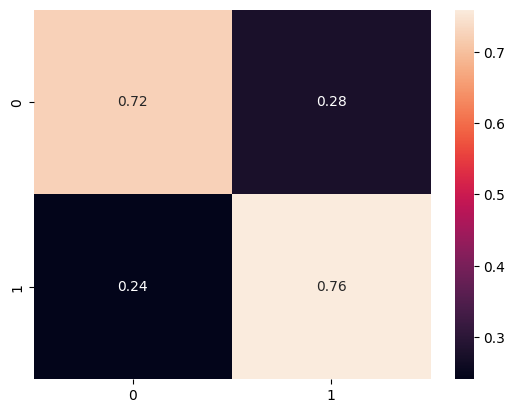

In [ ]:
y_pred_all = best_model.predict(X)
print(f'The accuracy of prediction on the whole imbalanced binary dataset:{f1_score(y,y_pred_all,average="weighted")}\n')
print('The confusion matrix:\n')
conf_mat = confusion_matrix(y, y_pred_all, normalize='true')
print(conf_mat)
ax=sns.heatmap(conf_mat, annot=True)

<style>
    .markdown-title {
        font-family: B Yekan+;
        color: #BA4A00;
        font-weight: 1500;
        font-size: 220%;
        text-align: center;
        padding: 40px 0px 0px 5px      
    }
    .markdown-container {
        font-family: B Yekan+;
        color: #27AE60;
        font-weight: 1500;
        direction: rtl;
        text-align: justify;
        margin: 0px 50px 0px 50px;
        line-height: 180%;
    }
    .table {
        align: center;
        border: 0px;
        width: 100%;
        text-align: center;
    }
    .specialP {
        font-family: B Yekan+;
        color: #F1C40F;
        font-weight: 1500;
        direction: rtl;
        text-align: justify;
        margin: 0px 50px 0px 50px;
        line-height: 180%;
    }
</style>

<hr><hr><hr>
<table>
    <tr>
        <th class="table">            
            <p class = "markdown-title"> SGDClassifier مرحله 22 - استفاده از مدل </p>            
        </th>
    </tr>
    <tr>
        <th class="table">            
            <p class = "markdown-container">
             مدل SGDClassifier یک مدل کلاسیفیکیشن خطی (linear_model) می‌باشد. نکته جالب توجه در این مدل این است که می‌تواند داده ما را حدودا در 30 ثانیه کلاسیفای کند! 
            در قسمت جستجوی تصادفی در داخل کد ما، با استفاده از تابع RandomizedSearchCV، داده‌های ما را بصورت تصادفی محاسبه می‌کند. این تابع برای پیدا کردن هایپرپارامتر مقادیر آلفا را به صورت تصادفی از توزیع یونیفورم پیدا می‌کند. 
            <p class="specialP">
            نکته بسیار جالب این است که الگوریم این مدل با دقت 76٪ درصد و در 33 ثانیه محاسبات را انجام و نتیجه را ارائه داد! </p>
             </p>            
        </th>
    </tr>
</table>

</br>
<span dir="rtl" align="center" style="color: #2E86C1">
<p><b> 👇 در قطعه کد زیر آن را مشاهده می‌کنید 👇 </b></p>

In [ ]:
sgd = SGDClassifier()

param_dist = {
    'loss':['log', 'modified_huber'],
    'penalty': ['l1', 'l2'],
    'alpha': np.random.uniform(0, 0.01, 5),
    'learning_rate': ['constant', 'optimal'],
    'eta0': np.random.uniform(0, 0.1, 5),
    'max_iter': [100,200,300]
}
random_search = RandomizedSearchCV(
    sgd,
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    random_state=42
)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best parameters: ", random_search.best_params_)
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
f1 = f1_score(y_test, y_pred, average="weighted")
print("F1-score on test set: ", f1)

Best parameters:  {'penalty': 'l1', 'max_iter': 200, 'loss': 'modified_huber', 'learning_rate': 'optimal', 'eta0': 0.04713087653177746, 'alpha': 0.003950701583561241}
F1-score on test set:  0.7601246185939267


<style>
    .markdown-title {
        font-family: B Yekan+;
        color: #BA4A00;
        font-weight: 1500;
        font-size: 220%;
        text-align: center;
        padding: 40px 0px 0px 5px      
    }
    .markdown-container {
        font-family: B Yekan+;
        color: #27AE60;
        font-weight: 1500;
        direction: rtl;
        text-align: justify;
        margin: 0px 50px 0px 50px;
        line-height: 180%;
    }
    .table {
        align: center;
        border: 0px;
        width: 100%;
        text-align: center;
    }
    .specialP {
        font-family: B Yekan+;
        color: #F1C40F;
        font-weight: 1500;
        direction: rtl;
        text-align: justify;
        margin: 0px 50px 0px 50px;
        line-height: 180%;
    }
</style>

<hr><hr><hr>
<table>
    <tr>
        <th class="table">            
            <p class = "markdown-title"> SGD مرحله ۲۳ - آنالیز مدل </p>            
        </th>
    </tr>
    <tr>
        <th class="table">            
            <p class = "markdown-container">
             این قسمت از کد ضرایب ویژگی ها را در بهترین مدل طبقه بندی کننده SGD محاسبه و نمایش می دهد. سپس ویژگی ها را بر اساس مقدار مطلق ضرایب آنها مرتب می کند و چاپ می کند. این شبیه کاری است که قبلاً با مدل رگرسیون لجستیک انجام دادیم. این قطعه کد می‌تواند بینش‌هایی در مورد اینکه کدام ویژگی‌ها در پیش‌بینی‌های مدل SGD بیشترین تأثیر را دارند، ارائه دهد.
            مجددا در اینجا ملاحظه می‌شود که مرتبه مردها بالاتر از زن‌ها قرار گرفته است. بدین معنی که مردها بیشتر از زن‌ها در معرض بیماری دیابت هستند. بنابراین می‌توان نتیجه گرفت که نوع جنسبت در ابتلای به این بیماری مهم است. همچنین از مقادیر اثرگذار دیگر در این خروجی می‌توان به چکاب کلسترول، فشار خون بالا، مصرف الکل، سلامت عمومی فرد و داشتن کلسترول بالا اشاره کرد و در مقابل سلامت روان، بیمه درمانی، آسیب‌های جسمی اخیر و سکته از اهمیت کمتری برخوردار می‌باشند. <p class="specialP"> نکته مهم این است که در این گزارش نمی‌توان اینطور برداشت کرد که اعداد مثب‌تر بیشتر هستند و اعدادی که به سمت منفی سیر می‌کنند کمتر هستند زیرا که این مقادیر به صورت Absolut هستند، در واقع این تابع بصورت خطی عمل می‌کند (به صورت Correlation عمل نمی‌کند) و چنین برداشتی اشتباه است. 
             </p>
             </p>
        </th>
    </tr>
</table>

</br>
<span dir="rtl" align="center" style="color: #2E86C1">
<p><b> 👇 در قطعه کد زیر آن را مشاهده می‌کنید 👇 </b></p>

In [ ]:
coefficients = best_model.coef_[0]
feature_names = list(X.columns)
feature_coefficients = list(zip(feature_names, coefficients))
sorted_feature_coefficients = sorted(
    feature_coefficients, key=lambda x: abs(x[1]), reverse=True
)

for feature, coefficient in sorted_feature_coefficients:
    print(f"Feature: {feature}, Coefficient: {coefficient}")

Feature: Age, Coefficient: 0.7215237662678236
Feature: CholCheck, Coefficient: 0.35675647074128725
Feature: HighBP, Coefficient: 0.29743124768851387
Feature: HvyAlcoholConsump, Coefficient: -0.2639797090910214
Feature: GenHlth, Coefficient: 0.2554003232616745
Feature: HighChol, Coefficient: 0.21795104465704565
Feature: BMI, Coefficient: 0.17744051541242903
Feature: PhysHlth, Coefficient: -0.1067393421179176
Feature: HeartDiseaseorAttack, Coefficient: 0.07199926856566968
Feature: gender_0.0, Coefficient: -0.0694258269085132
Feature: DiffWalk, Coefficient: 0.04695692362904113
Feature: Smoker, Coefficient: 0.0
Feature: Stroke, Coefficient: 0.0
Feature: PhysActivity, Coefficient: 0.0
Feature: AnyHealthcare, Coefficient: 0.0
Feature: MentHlth, Coefficient: 0.0
Feature: gender_1.0, Coefficient: 0.0


<style>
    .markdown-title {
        font-family: B Yekan+;
        color: #BA4A00;
        font-weight: 1500;
        font-size: 220%;
        text-align: center;
        padding: 40px 0px 0px 5px      
    }
    .markdown-container {
        font-family: B Yekan+;
        color: #27AE60;
        font-weight: 1500;
        direction: rtl;
        text-align: justify;
        margin: 0px 50px 0px 50px;
        line-height: 180%;
    }
    .table {
        align: center;
        border: 0px;
        width: 100%;
        text-align: center;
    }
    .specialP {
        font-family: B Yekan+;
        color: #F1C40F;
        font-weight: 1500;
        direction: rtl;
        text-align: justify;
        margin: 0px 50px 0px 50px;
        line-height: 180%;
    }
</style>

<hr><hr><hr>
<table>
    <tr>
        <th class="table">            
            <p class = "markdown-title"> مرحله 24 - رسم ماتریکس سردرگمی داده </p>            
        </th>
    </tr>
    <tr>
        <th class="table">            
            <p class = "markdown-container">
             در اینجا مجددا مشاهده می‌کنیم که مدل ما overfit است. با توجه به بالانس بودن داده‌ها، اختلاف آمار زیاد نمی‌باشد.
            <p class="specialP">
            این که کد ما بینش‌های دقیقی را درباره عملکرد مدل دسته‌بندی کننده SGD روی مجموعه آزمایشی ارائه می‌دهد. ابتدا گزارش دسته‌بندی را که شامل دقت، بازخوانی، - score F1 و حمایت برای هر کلاس است را نمایش می‌دهد. سپس این ماتریس، اشتباهات نرمال‌شده را به صورت عددی و به عنوان یک تصویر نمایشی هیت‌مپ نمایش می‌دهد. این اطلاعات به ما کمک می‌کند تا درک کنیم که مدل ما چقدر خوب عمل می‌کند و در کجا ممکن است خطاهایی داشته باشد. </p>
             </p>            
        </th>
    </tr>
</table>

</br>
<span dir="rtl" align="center" style="color: #2E86C1">
<p><b> 👇 در قطعه کد زیر آن را مشاهده می‌کنید 👇 </b></p>

              precision    recall  f1-score   support

         0.0       0.94      0.72      0.81     42754
         1.0       0.34      0.77      0.47      7982

    accuracy                           0.73     50736
   macro avg       0.64      0.74      0.64     50736
weighted avg       0.85      0.73      0.76     50736


The confusion matrix:

[[0.71726622 0.28273378]
 [0.23277374 0.76722626]]


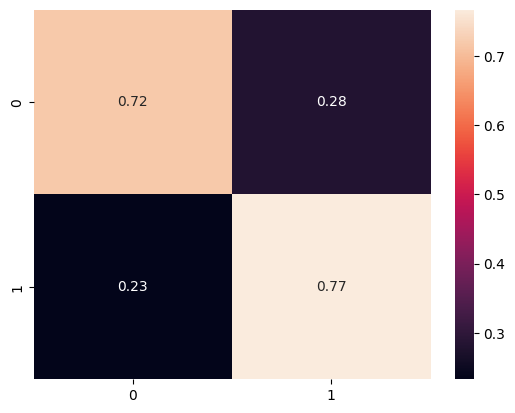

In [ ]:
print(classification_report(y_test, y_pred))
print('\nThe confusion matrix:\n')
conf_mat = confusion_matrix(y_test, y_pred, normalize='true')
print(conf_mat)
ax=sns.heatmap(conf_mat, annot=True)


<style>
    .markdown-title {
        font-family: B Yekan+;
        color: #BA4A00;
        font-weight: 1500;
        font-size: 220%;
        text-align: center;
        padding: 40px 0px 0px 5px      
    }
    .markdown-container {
        font-family: B Yekan+;
        color: #27AE60;
        font-weight: 1500;
        direction: rtl;
        text-align: justify;
        margin: 0px 50px 0px 50px;
        line-height: 180%;
    }
    .table {
        align: center;
        border: 0px;
        width: 100%;
        text-align: center;
    }
    .specialP {
        font-family: B Yekan+;
        color: #F1C40F;
        font-weight: 1500;
        direction: rtl;
        text-align: justify;
        margin: 0px 50px 0px 50px;
        line-height: 180%;
    }
</style>

<hr><hr><hr>
<table>
    <tr>
        <th class="table">            
            <p class = "markdown-title"> XGboost مرحله 25 -آنالیز مدل </p>            
        </th>
    </tr>
    <tr>
        <th class="table">            
            <p class = "markdown-container">
             مدل XGBoost یک الگوریتم یادگیری ماشین مبتنی بر درخت تصمیم‌گیری است که به طور خاص برای مسائل دسته‌بندی و رگرسیون طراحی شده است. نام XGBoost مخفف "eXtreme Gradient Boosting" است که نشان‌دهنده استفاده از روش تقویت گرادیان با توابع هزینه‌ی گرادیانی ویژه است.
            در XGBoost، مدل تشکیل شده از مجموعه‌ای از درخت‌های تصمیم‌گیری ضعیف است، که به صورت ترتیبی ساخته می‌شوند و با توجه به خطای پیش‌بینی‌های قبلی بهبود می‌یابند. این بهبود به وسیله‌ی ترکیب پیش‌بینی‌های چند درخت و سعی در کاهش خطاها به حداقل ممکن انجام می‌شود. از تکنیک‌هایی مانند تغییر عمق درخت‌ها، تعیین وزن به داده‌ها و کاهش افتراق‌های خطا برای افزایش عملکرد و عمومیت مدل استفاده می‌شود.
            XGBoost از تکنیک‌هایی مانند تخمین تابع هزینه‌ی میانگین مربعات (Least Squares)، تابع هزینه‌ی لگاریتمی (Log Loss) و سایر توابع هزینه‌های سفارشی پشتیبانی می‌کند. همچنین، قادر به مدیریت مسائل دسته‌بندی چندکلاسه، انتخاب ویژگی‌ها، کاهش افتراق‌های اضافی و رفتارهای بسیاری دیگر است.
            به عنوان یک الگوریتم محبوب و قوی، XGBoost اغلب در مسابقات مختلف یادگیری ماشین با عملکرد برتر حضور داشته و در بسیاری از برنامه‌های عملی و تجاری مورد استفاده قرار می‌گیرد.
            <p class="specialP">
            در کد زیر (مانند مرحله ۲۲) با استفاده از روش RandomizedSearchCV نتیجه خروجی را می‌بینیم. 81٪ عددی هست که این مدل به ما می‌دهد و ما حدس می‌زنیم که این آمار overfit باشد، با این حال ما برای اطمینان بیشتر یک نمودار رسم ‌میکنیم (feature_importances_sorted) تا با استفاده از آن از نتایج حاصل شده اطلاعات بیشتری به دست بیاوریم. نتیجه حاصله در نمودار هیت‌مپ به ما می‌گوید که بیشتر افراد سالم شناسایی شده‌اند و با این اوصاف این مدل نتیجه خوشایندی به ما نمی‌دهد. (71٪ درصد افرادی که دیابتی تشخیص داده شده‌اند در واقع دیابت نداشته‌اند و سالم بوده‌اند در عوض تنها 29٪ از افرادی که دچار بیماری دیابت بوده‌اند را شناسایی کرده است) </p>
             </p>            
        </th>
    </tr>
</table>

</br>
<span dir="rtl" align="center" style="color: #2E86C1">
<p><b> 👇 در قطعه کد زیر آن را مشاهده می‌کنید 👇 </b></p>

In [ ]:
xgb_classifier = XGBClassifier()
param_dist = {
    'n_estimators': np.random.randint(100, 1000, 4),  
    'max_depth': np.random.randint(1, 20, 5), 
    'learning_rate': np.random.uniform(0.01, 0.1, 4), 
    'subsample': np.random.uniform(0.5, 1.0, 4), 
    'colsample_bytree': np.random.uniform(0.5, 1.0, 4),  
    'gamma': np.random.uniform(0, 5, 4)  
}



# Create an instance of RandomizedSearchCV
random_search = RandomizedSearchCV(
    xgb_classifier,
    param_distributions=param_dist,
    n_iter=5,
    cv=5,
    scoring=make_scorer(f1_score),
    random_state=42
)


# Fit the random search to our data
random_search.fit(X_train, y_train)
print("Best parameters: ", random_search.best_params_)
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
f1 = f1_score(y_test, y_pred, average="weighted")
print("F1-score on test set: ", f1)

Best parameters:  {'subsample': 0.826642923985935, 'n_estimators': 863, 'max_depth': 13, 'learning_rate': 0.05828295439053702, 'gamma': 1.0100627358208807, 'colsample_bytree': 0.7602590225838985}
F1-score on test set:  0.8188644044054907


In [ ]:
#The code snippet we've provided prints the feature importances of the best XGBoost classifier model.
print(best_model.feature_importances_)

[0.23124814 0.05107835 0.06613772 0.06672846 0.01732144 0.01795353
 0.02134062 0.0170325  0.04610254 0.02036279 0.11090457 0.03746978
 0.05152547 0.02039873 0.18665372 0.01876661 0.01897499]


In [ ]:
importances = best_model.feature_importances_
feature_names = X.columns

feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

feature_importances_sorted = feature_importances.sort_values('Feature')

print(feature_importances_sorted)

                 Feature  Importance
14                   Age    0.186654
9          AnyHealthcare    0.020363
3                    BMI    0.066728
2              CholCheck    0.066138
13              DiffWalk    0.020399
10               GenHlth    0.110905
6   HeartDiseaseorAttack    0.021341
0                 HighBP    0.231248
1               HighChol    0.051078
8      HvyAlcoholConsump    0.046103
11              MentHlth    0.037470
7           PhysActivity    0.017033
12              PhysHlth    0.051525
4                 Smoker    0.017321
5                 Stroke    0.017954
15            gender_0.0    0.018767
16            gender_1.0    0.018975


              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91     42754
         1.0       0.46      0.29      0.35      7982

    accuracy                           0.84     50736
   macro avg       0.67      0.61      0.63     50736
weighted avg       0.81      0.84      0.82     50736


The confusion matrix:

[[0.93717547 0.06282453]
 [0.7116011  0.2883989 ]]


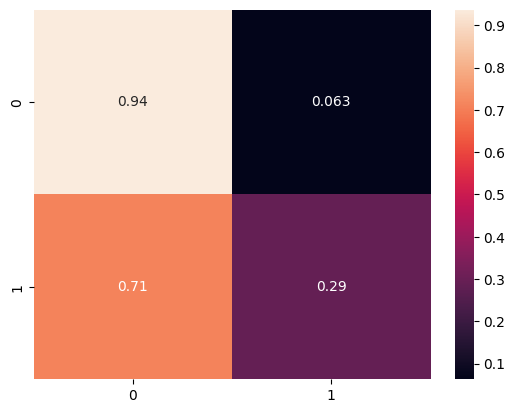

In [ ]:
print(classification_report(y_test, y_pred))
print('\nThe confusion matrix:\n')
conf_mat = confusion_matrix(y_test, y_pred, normalize='true')
print(conf_mat)
ax=sns.heatmap(conf_mat, annot=True)

In [ ]:
scaler = StandardScaler()
df = scaler.fit_transform(df)

<style>
    .markdown-title {
        font-family: B Yekan+;
        color: #BA4A00;
        font-weight: 1500;
        font-size: 220%;
        text-align: center;
        padding: 40px 0px 0px 5px      
    }
    .markdown-container {
        font-family: B Yekan+;
        color: #27AE60;
        font-weight: 1500;
        direction: rtl;
        text-align: justify;
        margin: 0px 50px 0px 50px;
        line-height: 180%;
    }
    .table {
        align: center;
        border: 0px;
        width: 100%;
        text-align: center;
    }
    .specialP {
        font-family: B Yekan+;
        color: #F1C40F;
        font-weight: 1500;
        direction: rtl;
        text-align: justify;
        margin: 0px 50px 0px 50px;
        line-height: 180%;
    }
</style>

<hr><hr><hr>
<table>
    <tr>
        <th class="table">            
            <p class = "markdown-title"> مرحله نهایی - بررسی اجمالی نحوه عملکرد تمامی مراحل </p>            
        </th>
    </tr>
    <tr>
        <th class="table">            
            <p class = "markdown-container">
             در این مرحله ما قصد داریم تمام مدل‌ها بصورت خام و دقت آن را بر اساس شاخص validation در کوتاه‌ترین زمان ممکن در کنار یکدیگر تست کنیم و بر اساس عملکرد آن‌ها مقایسه انجام دهیم. در مرحله اول قصد داشتیم دقت تست را بسنجیم اما چون منابع سخت افزاری کمی در اختیار داشتیم مجبور شدیم به سری train  و مجموعه validation اکتفا کنیم، بنابراین دقت بر روی مجموعه تست مانده است. در نهایت در دیتافریم خروجی این قطعه کد ملاحظه می‌کنیم که Random Forest روی داده validation (ستون val_accuracy)بهترین عملکرد را دارد. در ادامه Gradient Boosting، Decision Tree و Logistic Regression در رتبه‌های بعدی عملکرد بهتری را ارائه داده‌اند. 
             <p class="specialP">
             این کد، ارزیابی عملکرد مدل‌های یادگیری ماشین مختلف بر روی مجموعه داده با استفاده از اندازه‌گیرهای ارزیابی متنوع است. مدل‌ها شامل رگرسیون لجستیک، درخت تصمیم، جنگل تصادفی، همسایگان‌های نزدیک (KNN)، ماشین بردار پشتیبان (SVM)، نویس بیز و گرادیان بوستینگ می‌شوند. نتایج مرتب می‌شوند تا مدل با بیشترین دقت اعتبارسنجی شناسایی شود. این اطلاعات می‌تواند در انتخاب مدل با عملکرد برتر برای وظیفه خاص شما راهنمایی کند. </p>
             </p>            
        </th>
    </tr>
</table>

In [ ]:
X = df_encoded.iloc[:, 1:]
y = df_encoded.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=1,
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train,
    y_train,
    test_size=0.2,
    random_state=1,
)
# X_train, X_val, y_train, y_val = train_test_split(
#     X_train, y_train, test_size=0.2, random_state=1
# )
# pd.Series(y_test).value_counts().plot(kind="bar")
smt = SMOTE(random_state=1)
X_train, y_train = smt.fit_resample(X_train, y_train)

def evaluate_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    df = pd.DataFrame({'train_accuracy': [accuracy_score(y_train, y_train_pred)],
                        'train_precision': [precision_score(y_train, y_train_pred)],
                        'train_recall': [recall_score(y_train, y_train_pred)],
                        'train_f1': [f1_score(y_train, y_train_pred)],
                        'train_roc_auc': [roc_auc_score(y_train, y_train_pred)],
                        
                        'val_accuracy': [accuracy_score(y_val, y_val_pred)],
                        'val_precision': [precision_score(y_val, y_val_pred)],
                        'val_recall': [recall_score(y_val, y_val_pred)],
                        'val_f1': [f1_score(y_val, y_val_pred)],
                        'val_roc_auc': [roc_auc_score(y_val, y_val_pred)]})
    return df


models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# iterate through the dictionary and evaluate each model
results_l = []
for name, model in models.items():
    model_results = evaluate_model(model, X_train, y_train, X_val, y_val)
    model_results['model'] = name
    results_l.append(model_results)

# concatenate the results
results = pd.concat(results_l, axis=0).reset_index(drop=True)

results.sort_values(by='val_accuracy', ascending=False)


,train_accuracy,train_precision,train_recall,train_f1,train_roc_auc,val_accuracy,val_precision,val_recall,val_f1,val_roc_auc,model
2,0.996659,0.998306,0.995007,0.996654,0.996659,0.831654,0.461132,0.323148,0.380002,0.625704,Random Forest
6,0.874905,0.885834,0.860742,0.873108,0.874905,0.823795,0.451375,0.481327,0.465870,0.685092,Gradient Boosting
1,0.996663,0.999449,0.993874,0.996654,0.996663,0.775013,0.316952,0.354321,0.334596,0.604628,Decision Tree
0,0.750782,0.738342,0.776879,0.757121,0.750782,0.732464,0.345908,0.758488,0.475132,0.743004,Logistic Regression
4,0.767106,0.738561,0.826932,0.780252,0.767106,0.724039,0.340819,0.779938,0.474354,0.746679,SVM
3,0.887679,0.829971,0.975124,0.896711,0.887679,0.710759,0.301719,0.617593,0.405389,0.673026,KNN
5,0.727452,0.702080,0.790228,0.743551,0.727452,0.685900,0.308017,0.776080,0.441005,0.722424,Naive Bayes
